In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#it will help us to cross validate
from sklearn.model_selection import RandomizedSearchCV
%config Completer.use_jedi = False

In [3]:
bank_loan=pd.read_csv("D:\\capstone\\bank.csv",sep=';')

In [4]:
#there is no null value in this data
bank_loan.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
categorical_value=[feature for feature in bank_loan if bank_loan[feature].dtype =='O']

In [6]:
#converting string value to numarical
for feature in categorical_value:
    temp=bank_loan[feature].unique()
    temp_df={i:j for j,i in enumerate(temp,0)}
    bank_loan[feature]=bank_loan[feature].map(temp_df)

<AxesSubplot:>

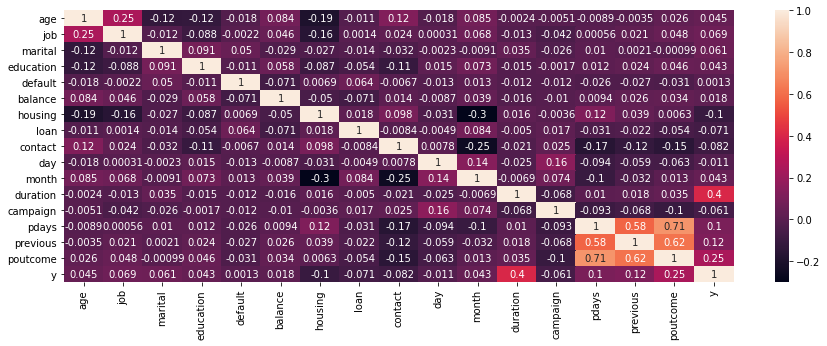

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(bank_loan.corr(),annot=True)

C:\Users\Rick\Anaconda3\envs\bankloan\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

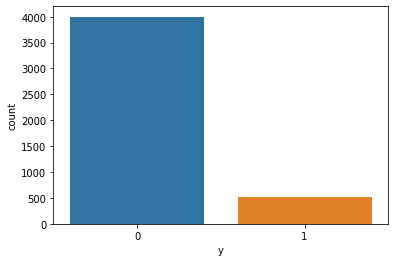

In [8]:
sns.countplot(bank_loan['y'])

In [9]:
print("The data has {}% of loan given".format(round((bank_loan['y']==1).sum()/len(bank_loan),2)))
print("The data has {}% of loan not given".format(round((bank_loan['y']==0).sum()/len(bank_loan),2)))

The data has 0.12% of loan given
The data has 0.88% of loan not given


In [10]:
X=bank_loan.iloc[:,:-1]
y=bank_loan.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [111]:
from sklearn import svm

In [112]:
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)
clf_svm=svm.SVC(random_state=42)
clf_svm.fit(X_train_scale,y_train)

SVC(random_state=42)

In [113]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score

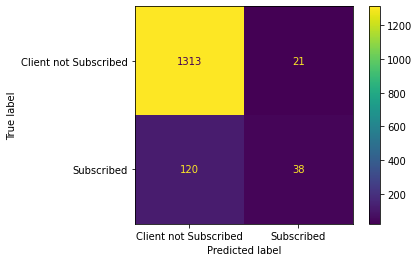

In [114]:
plot_confusion_matrix(clf_svm,
                      X_test_scale,y_test,
                     values_format='d',
                     display_labels=["Client not Subscribed","Subscribed"])

In [115]:
prediction=clf_svm.predict(X_test)

In [116]:
accuracy_score(y_test,prediction)

0.8941018766756033

### Hybrid Sampling
As you can see that the data has imbalance dataset so we have to balance the dataset to improve the accuracy

In [ ]:
from imblearn.combine import SMOTETomek
new=SMOTETomek()
x_ores,y_ores=new.fit_sample(X,y)
from collections import Counter
print("Resampled dataset shape{}".format(Counter(y_ores)))
print("Sampled dataset shape{}".format(Counter(y)))
X_train, X_test, y_train, y_test = train_test_split(x_ores, y_ores, test_size=0.33, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_random=RandomForestClassifier()

In [99]:
rf_random.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
prediction=rf_random.predict(X_test)

In [101]:
accuracy_score(y_test,prediction)

0.9287113200156678

In [117]:
import pickle
pick_open=open("Client_subcription.pkl",'wb')
pickle.dump(rf_random,pick_open)
pick_open.close()